<a href="https://colab.research.google.com/github/AyuSekarSafitri/Pemrograman_Python/blob/main/Tugas_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Lib eks python

import numpy as np
import matplotlib.pyplot as plt

Path Loss

In [2]:
def pathlossmod(des, fxc, areas, pems, pens):
  
  if fxc in range(150,1501):
    c1 = 69.55
    c2 = 26.16
  elif fxc in range(1501,2001):
    c1 = 46.3
    c2 = 33.9


  if (areas == "Urban"): #Daerah Urban
    Cm = 0
  elif (areas == "Suburban"): #Daerah Suburban
    Cm = -2*((np.log10((fxc/28)**2))-5.4)
  elif (areas == "Open"): #Daerah Open
    Cm = -4.78*(np.log10(fxc))+18.33*(np.log10(fxc))-40.94



  apen = (1.1*np.log10(fxc) - 0.7)*pens - (1.56*np.log10(fxc) - 1.8)
  losspath = c1 + (c2*np.log10(fxc)) - (13.83*np.log10(pems)) - apen + ((44.9-6.55*np.log10(pems))*np.log(des)) - Cm
  return losspath

In [3]:
htower = 80      #meter
huser = 1.5      #meter
desmax = 1000         #meter
desmin = 300          #meter
n = 200             #user
loc1 = "Urban"
loc2 = "Suburban"
loc3 = "Open"
f1 = 1800           #Mhz
f2 = 900            #Mhz
f3 = 700            #Mhz

dran=np.random.randint(desmin,desmax,n)

In [4]:
#1
lpUrban = pathlossmod(dran,f1,loc1,htower,huser)
lpSuburban = pathlossmod(dran,f1,loc2,htower,huser)
lpOpen = pathlossmod(dran,f1,loc3,htower,huser)

#2
lpUrban2 = pathlossmod(dran,f2,loc1,htower,huser)
lpUrban3 = pathlossmod(dran,f3,loc1,htower,huser)

In [5]:
#Sorting agar tertata
#Sorting Jarak
sortingdran=dran[np.argsort(dran)]

#Sorting data arahan 1
sortingUrban=lpUrban[np.argsort(dran)]
sortingSuburban=lpSuburban[np.argsort(dran)]
sortingOpen=lpOpen[np.argsort(dran)]

#Sorting data arahan 2
sortingUrban2=lpUrban2[np.argsort(dran)]
sortingUrban3=lpUrban3[np.argsort(dran)]

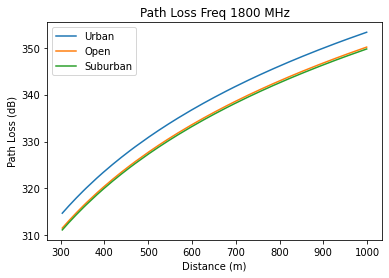

In [6]:
plt.figure()
plt.title("Path Loss Freq 1800 MHz")
plt.plot(sortingdran,sortingUrban, label = "Urban")
plt.plot(sortingdran,sortingOpen, label = "Open")
plt.plot(sortingdran,sortingSuburban, label = "Suburban")
plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()

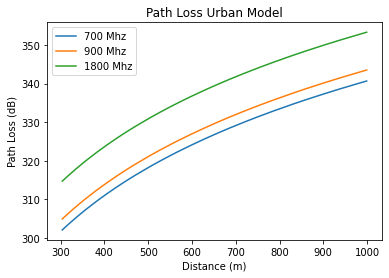

In [7]:
plt.figure()
plt.title("Path Loss Urban Model")
plt.plot(sortingdran,sortingUrban3, label = "700 Mhz")
plt.plot(sortingdran,sortingUrban2, label = "900 Mhz")
plt.plot(sortingdran,sortingUrban, label = "1800 Mhz")
plt.xlabel('Distance (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.show()

Daya Transmitter

In [8]:
def daytercal (ht, hl, gt, gr):
  dayter = (10*(np.log(ht))) - hl + gt + gr
  dayter = 10**(dayter/10)
  return dayter

power_tran = 30000
gain_tran = 10
gain_rece = 2

In [9]:
PTUrban = daytercal(power_tran, sortingUrban, gain_tran, gain_rece)
PTSuburban = daytercal(power_tran, sortingSuburban, gain_tran, gain_rece)
PTOpen = daytercal(power_tran, sortingOpen, gain_tran, gain_rece)
PTUrban2 = daytercal(power_tran, sortingUrban2, gain_tran, gain_rece)
PTUrban3 = daytercal(power_tran, sortingUrban3, gain_tran, gain_rece)

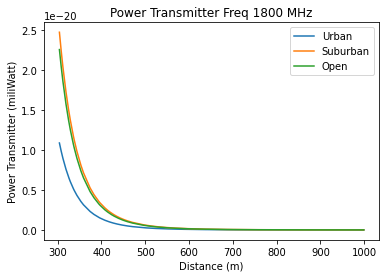

In [10]:
plt.figure()
plt.title("Power Transmitter Freq 1800 MHz")
plt.plot(sortingdran,PTUrban, label = "Urban")
plt.plot(sortingdran,PTSuburban, label = "Suburban")
plt.plot(sortingdran,PTOpen, label = "Open")
plt.xlabel('Distance (m)')
plt.ylabel('Power Transmitter (miliWatt)')
plt.legend()
plt.show()

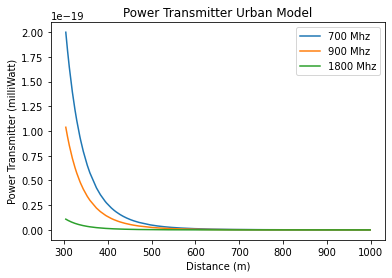

In [11]:
plt.figure()
plt.title("Power Transmitter Urban Model")
plt.plot(sortingdran,PTUrban3, label = "700 Mhz")
plt.plot(sortingdran,PTUrban2, label = "900 Mhz")
plt.plot(sortingdran,PTUrban, label = "1800 Mhz")
plt.xlabel('Distance (m)')
plt.ylabel('Power Transmitter (milliWatt)')
plt.legend()
plt.show()

Signal to Noise Ratio (SNR)

In [12]:
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [13]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

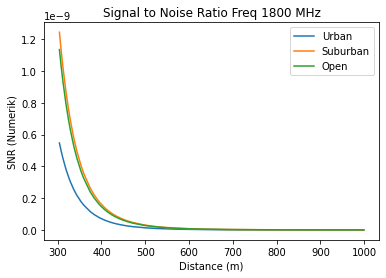

In [14]:
plt.figure()
plt.title("Signal to Noise Ratio Freq 1800 MHz")
plt.plot(sortingdran,SNRUrban, label = "Urban")
plt.plot(sortingdran,SNRSuburban, label = "Suburban")
plt.plot(sortingdran,SNROpen, label = "Open")
plt.xlabel('Distance (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

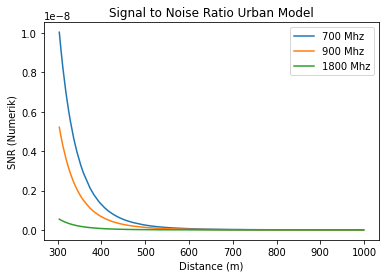

In [15]:
plt.figure()
plt.title("Signal to Noise Ratio Urban Model")
plt.plot(sortingdran,SNRUrban3, label = "700 Mhz")
plt.plot(sortingdran,SNRUrban2, label = "900 Mhz")
plt.plot(sortingdran,SNRUrban, label = "1800 Mhz")
plt.xlabel('Distance (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

Kapasitas Seluler

In [16]:
def kpsts (sig, BW):
  kpssel = BW*(np.log2(1+sig))
  return kpssel

In [17]:
KapasitasUrban = kpsts(SNRUrban, bw)
KapasitasSuburban = kpsts(SNRSuburban, bw)
KapasitasOpen = kpsts(SNROpen, bw)
KapasitasUrban2 = kpsts(SNRUrban2, bw)
KapasitasUrban3 = kpsts(SNRUrban3, bw)

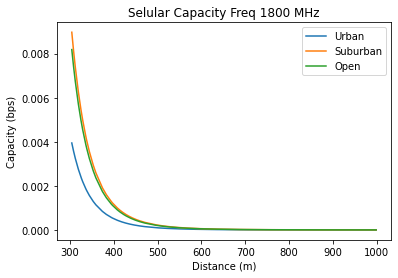

In [18]:
plt.figure()
plt.title("Selular Capacity Freq 1800 MHz")
plt.plot(sortingdran,KapasitasUrban, label = "Urban")
plt.plot(sortingdran,KapasitasSuburban, label = "Suburban")
plt.plot(sortingdran,KapasitasOpen, label = "Open")
plt.xlabel('Distance (m)')
plt.ylabel('Capacity (bps)')
plt.legend()
plt.show()

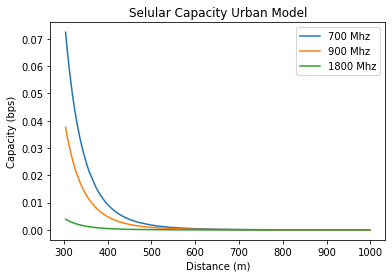

In [19]:
plt.figure()
plt.title("Selular Capacity Urban Model")
plt.plot(sortingdran,KapasitasUrban3, label = "700 Mhz")
plt.plot(sortingdran,KapasitasUrban2, label = "900 Mhz")
plt.plot(sortingdran,KapasitasUrban, label = "1800 Mhz")
plt.xlabel('Distance (m)')
plt.ylabel('Capacity (bps)')
plt.legend()
plt.show()